<a href="https://colab.research.google.com/github/pkalleda189/pkalleda189/blob/main/Airbnb_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: EDA on Airbnb_NY_2019 dataset**
## By: Saipranay Kalleda
GITHUB LINK: https://github.com/pkalleda189

# **Project Summary:**
Since its inception in 2008, Airbnb has revolutionized the travel industry by offering unique, personalized lodging experiences. The platform connects millions of guests and hosts worldwide, generating a wealth of data that is invaluable for business strategies, security, customer understanding, and innovation. In this project, we delve into a dataset of approximately 49,000 listings, featuring 16 columns of both categorical and numeric data, to uncover significant insights regarding price, house type, reviews, host performance, and other key aspects.

Categorical variables: neighbourhood_group, neighbourhood, room_type, host_name, name
Numeric variables: price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listing_count, availability_365

Before conducting any analysis, the data underwent cleaning to address missing values, outliers, and inconsistencies. For instance, listings with a price of zero were imputed with the median price to ensure meaningful analysis

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/Colab Notebooks/Python/Airbnb NYC 2019.csv'
df = pd.read_csv(path)

In [ ]:
df.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Dataset Duplicate Value Count
for col in df.columns:
  print(col, df[col].nunique())

id 48895
name 47905
host_id 37457
host_name 11452
neighbourhood_group 5
neighbourhood 221
latitude 19048
longitude 14718
room_type 3
price 674
minimum_nights 109
number_of_reviews 394
last_review 1764
reviews_per_month 937
calculated_host_listings_count 47
availability_365 366


In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


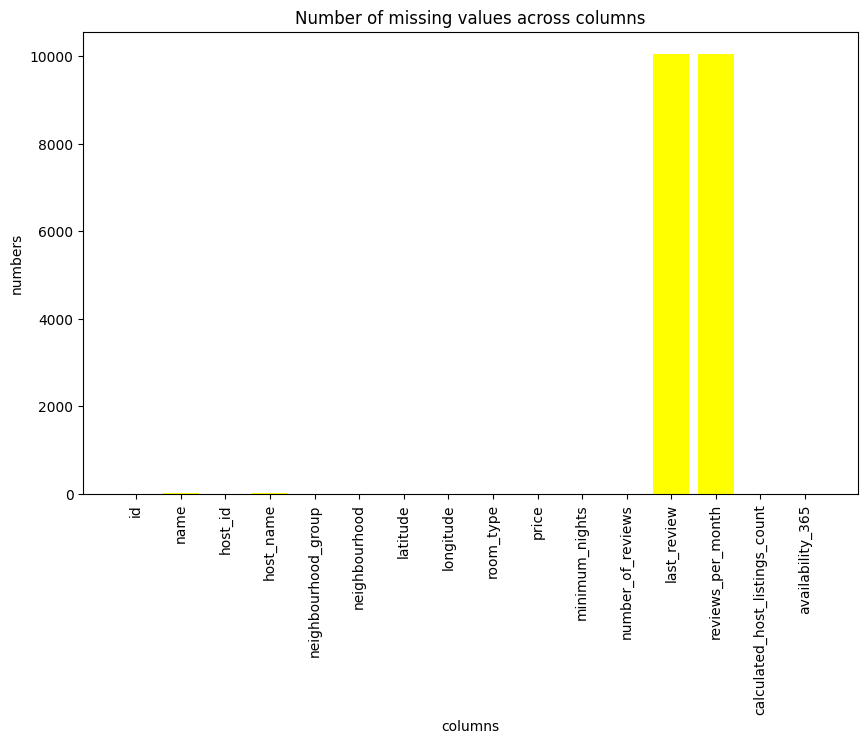

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
plt.bar(df.columns, missing_values, color = 'yellow')
plt.title('Number of missing values across columns')
plt.xlabel('columns')
plt.ylabel('numbers')
plt.xticks(rotation=90)
plt.show()

possibly here we have columns with null values which doesn't impact our analysis by greater extent. Few columns have missing values of host name and property name. Let us drop those rows from the dataset and further the reviews and latest review date are columns with most null values so let us keep them as it is. We will modify the data frame while we are analysing the reviews part.

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The possible errors in the given dataset are zero priced houses, which might be a erroneous and availability across 365 days which is also zero.

Outliers in our data can be 10000 usd house and minimum night as 1250

Below columns has no prominence and can be not useful in any kind of analysis that I would need for this business, so I would drop the below columns to avoid unnecessary space and ambiguity.

In [ ]:
df = df.drop(columns = ['name', 'latitude', 'longitude', 'last_review' ])

In [ ]:
#let us see the number of houses with zero prices
zero_priced = (df['price']==0).sum()
print(f'houses with zero price = {zero_priced}')

houses with zero price = 11


In [ ]:
#median price of a home
median_price = df['price'].median()
print(median_price)

106.0


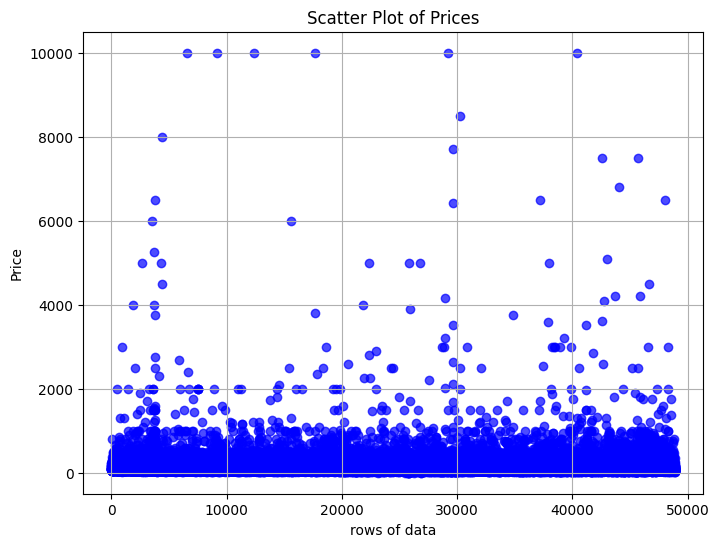

In [ ]:
#Scatter plot to check the distribution of prices
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df)), df['price'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Prices')
plt.xlabel('rows of data')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The data has many houses which are listed over 1000$, we need to make the distribution uniform before conducting any analyses and also we need to remove the zero priced homes as they don't provide any conclusive evidence.

In [ ]:
#replace NaN values
df['host_name'].fillna('other', inplace=True)
df['reviews_per_month'].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

When we look the data from perspective of a boxplot it states any value above or below the maximum and minimum calculated using IQR(Inter Quartile Range) would be considered outliers so let us skim the data wrt price and draw a Normal distribution curve.

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'lower_bound = {lower_bound}')
print(f'upper_bound = {upper_bound}')

lower_bound = -90.0
upper_bound = 334.0


In [ ]:
df_new_price = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]
df_new_price['price'].info()

<class 'pandas.core.series.Series'>
Index: 45918 entries, 0 to 48894
Series name: price
Non-Null Count  Dtype
--------------  -----
45918 non-null  int64
dtypes: int64(1)
memory usage: 717.5 KB


In [ ]:
df_new_price['price'] = df_new_price['price'].replace(0, median_price)

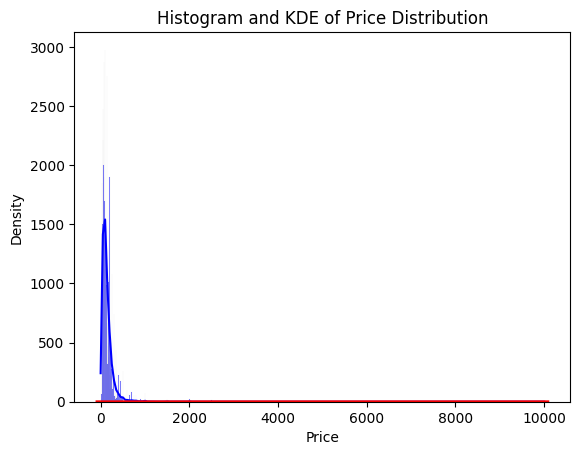

In [ ]:
# Plot histogram with kernel density estimate (KDE)
sns.histplot(data = df, x = 'price', kde=True, color='b')

# Optionally, overlay a KDE plot
sns.kdeplot(data = df, x = 'price', color='r', linestyle='-', linewidth=2)

plt.title('Histogram and KDE of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

I tried fitting the price data in normal distribuiton using KDE but the range of data is high. So there is big tail on right side. Toclear the tail we chopped it using IQR method and respective ranges are calculated in the above two steps.

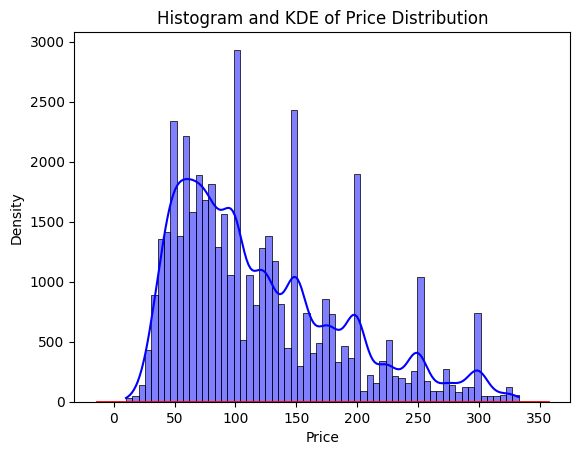

In [ ]:
# Plot histogram with kernel density estimate (KDE)
sns.histplot(data = df_new_price, x = 'price', kde=True, color='b')

# Optionally, overlay a KDE plot
sns.kdeplot(data = df_new_price, x = 'price', color='r', linestyle='-', linewidth=2)

plt.title('Histogram and KDE of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

The above two diagrams defines and gives us an understanding how our data is distributed over different price ranges. If we limit our findings uptil upper limit then we can see a evenly distributed data.

In [ ]:
#top hosts iin New york
df['host_name'].value_counts()
top_ten_hosts = df['host_name'].value_counts().head(15)
print(top_ten_hosts)

host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Mike            194
Andrew          190
Anna            187
Chris           182
Laura           182
Name: count, dtype: int64


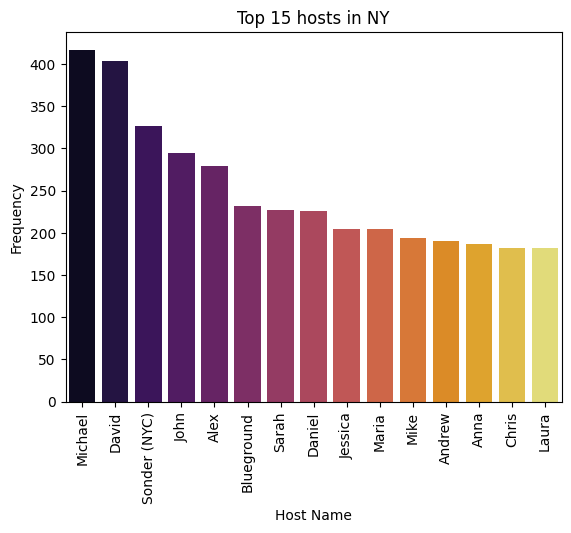

In [ ]:
#draw a bar plot of the top fifteen hosts
sns.barplot(x=top_ten_hosts.index, y = top_ten_hosts.values,palette='inferno')
plt.title('Top 15 hosts in NY')
plt.xlabel('Host Name')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()


We used a bargrapgh to highlight the top hosts across Newyork, this chart provides us the results in a simpler and more intuitive way.

In [ ]:
#most booked neighbourhoods
neighbour = df['neighbourhood'].value_counts().head(10)
print(neighbour)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64


In [ ]:
neighbour_group= df['neighbourhood_group'].value_counts().head()
print(neighbour_group)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


In [ ]:
df['neighbourhood'].nunique()

221

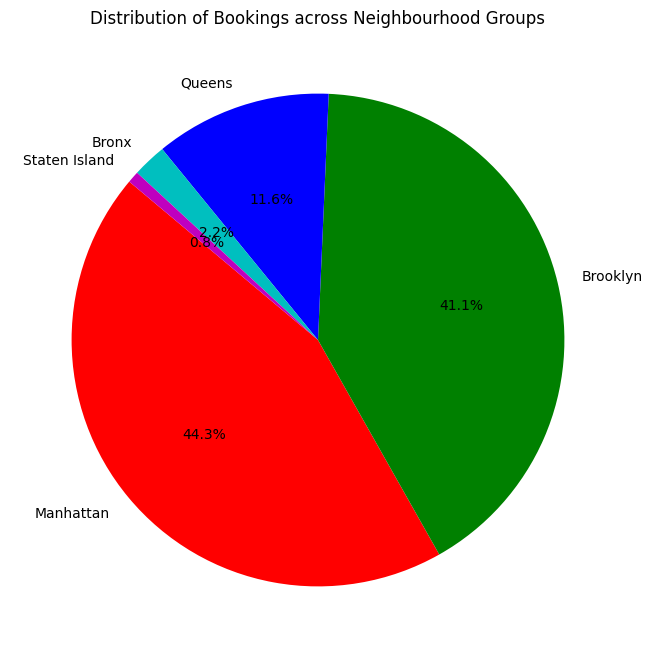

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(neighbour_group, labels=neighbour_group.index, autopct='%1.1f%%', startangle=140, colors=['r', 'g', 'b', 'c', 'm'])
plt.title('Distribution of Bookings across Neighbourhood Groups')
plt.show()

This piechart gives the distribution of properties across various neighbourhoods. We can assume that there is scope for more property listings in remaining b=neighbourhoods or the amount of travelers must be interested to stay around Manhattan and Brooklyn.

Text(0.5, 1.0, 'Distribution of prices across neighbour groups')

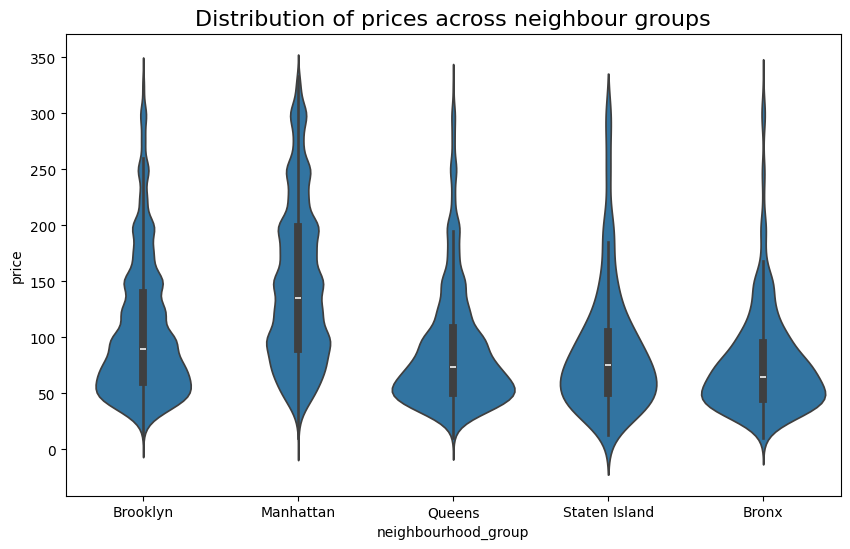

In [ ]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df_new_price, x = 'neighbourhood_group', y = 'price')
plt.title('Distribution of prices across neighbour groups', fontsize = 16)


Violin plot are extensively used to see the grouped distribuiton of prices acorss all the neighbourhoods.
From the above violin plot we can observe that the distribution of prices across all neighbourhood_groups. It is evident that most of the houses in Brooklyn area costs around 50USD. When it comes to Manhattan, the curve is evenly distributed but the peak is around 100usd which make sit clear it might be the pricey neighbourhood. For the remaining three, Queens, Staten Island and Bronx most of the listings on Airbnb are around 50usd and there are only few houses which costs above 200usd. Let us further dig down which type of houses are more pricey and what reviews has to say about house type and neighbourhood



In [ ]:

# Sort the DataFrame by 'neighbourhood_group' and 'reviews' in descending order
df_sorted = df_new_price.sort_values(['neighbourhood_group', 'number_of_reviews'], ascending=[True, False])

# Group by 'neighbourhood_group' and select the top 10 entries for each group
top_10_reviews_df = df_sorted.groupby('neighbourhood_group').head(10).reset_index(drop=True)

# dropping all the unnecessary columns
top_10_reviews_df = top_10_reviews_df.drop(columns = ['id', 'host_id', 'minimum_nights', 'reviews_per_month'])
print(top_10_reviews_df)

               host_name neighbourhood_group              neighbourhood  \
0                Chandra               Bronx                 Mott Haven   
1                Douglas               Bronx                 Mount Eden   
2                   Anne               Bronx                 Mott Haven   
3      Christian & Carla               Bronx                   Allerton   
4                   Luis               Bronx                Throgs Neck   
5                   Lori               Bronx          Concourse Village   
6                   Lori               Bronx                  Concourse   
7                   Anne               Bronx                 Mott Haven   
8                  Josue               Bronx                City Island   
9               Waundell               Bronx                 Highbridge   
10                   Asa            Brooklyn                 Park Slope   
11                 Wanda            Brooklyn                   Bushwick   
12                  Dani 

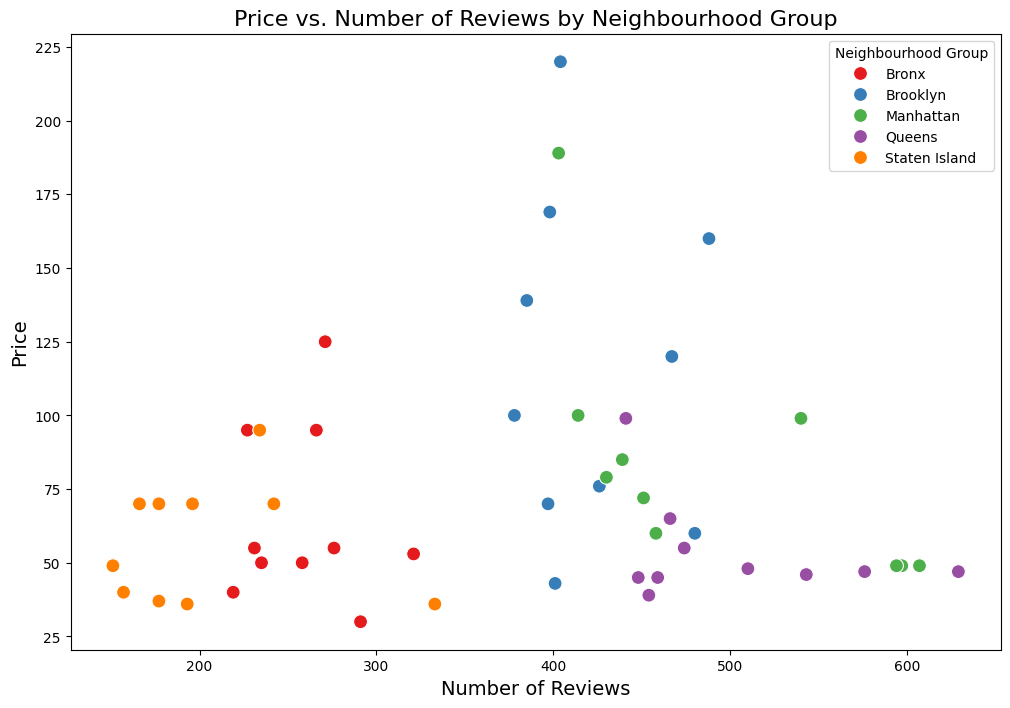

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_10_reviews_df, x='number_of_reviews', y='price', hue='neighbourhood_group', palette='Set1', s=100)

plt.title('Price vs. Number of Reviews by Neighbourhood Group', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Neighbourhood Group')
plt.show()

This scatter plot indicates the most reviewed listings in all the neighbourhoods. The listing with most number of reviews fall under Queens neighbourgroup, the properties with most reviews in Brooklyn are tend to be pricey, but unusually most reviewed properties in Manhattan are around it's mean price range.

Correlation between price and number of reviews: -0.03


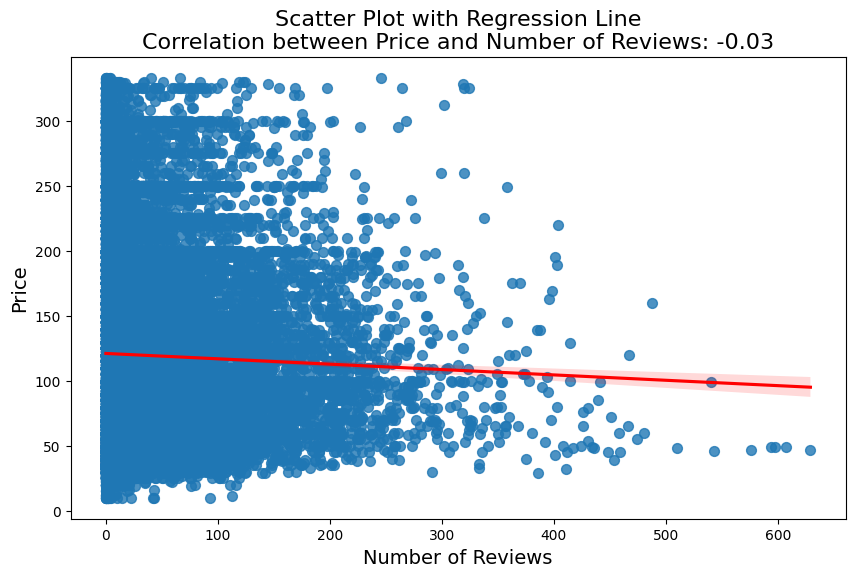

In [ ]:
# Calculate the correlation coefficient
correlation = df_new_price['price'].corr(df['number_of_reviews'])
print(f"Correlation between price and number of reviews: {correlation:.2f}")

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_new_price, x='number_of_reviews', y='price', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Scatter Plot with Regression Line\nCorrelation between Price and Number of Reviews: {correlation:.2f}', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

I wanted to validate if there is any correlation between price and corresponding number of reviews. The correlation coefficeint with -0.03 indicates there is negative correlation but it is not significant.

In [ ]:
price_by_room = df_new_price.groupby('room_type')['price'].mean()
print(price_by_room)

room_type
Entire home/apt    162.498771
Private room        79.052237
Shared room         59.479789
Name: price, dtype: float64


This was intended to see which room costs more as expected the mean prices for different room types are higher on entire apt when compared to private and shared rooms.

Let us further see the modified dataset for price which room constitutes of most number of outliers. We can use a box plot to spot the number of outliers.

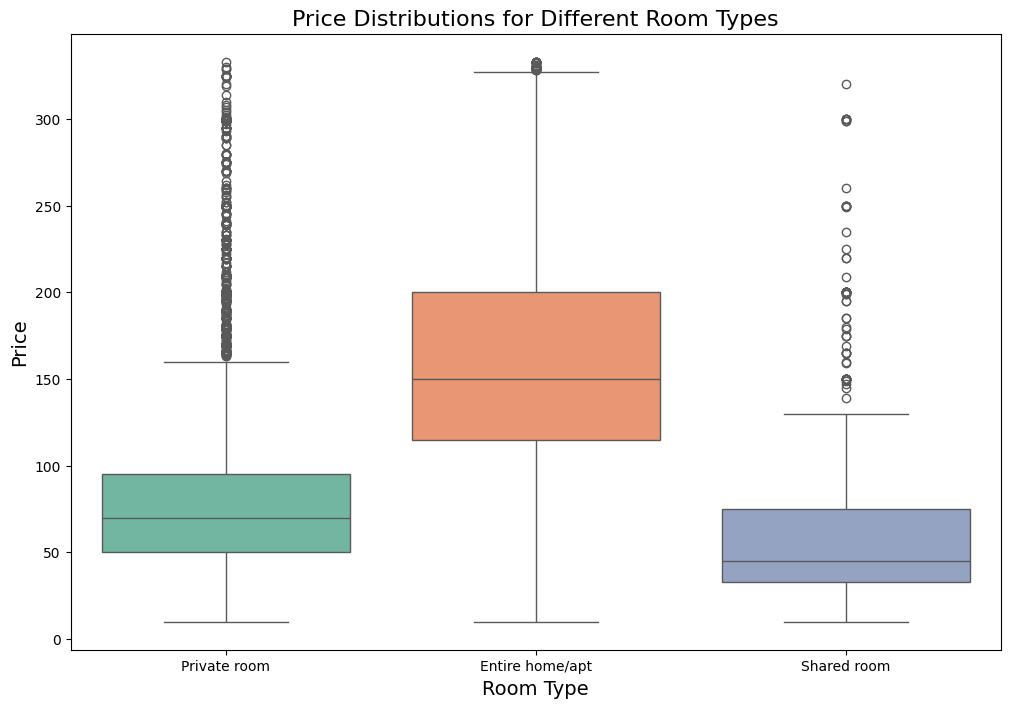

In [ ]:

# Plotting the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_new_price, x='room_type', y='price', palette='Set2')

plt.title('Price Distributions for Different Room Types', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

## **Conclusion:**
In conclusion, our analysis of the Airbnb dataset has provided a comprehensive view of pricing trends, room availability, and neighbourhood distributions. Utilizing boxplots, violin plots, and other visualizations, we explored relationships between variables like price and availability groups. While categorical variables could be further transformed using one-hot encoding for advanced insights such as heat maps, our focus on foundational analysis revealed key patterns and trends. Moving forward, leveraging advanced techniques can unlock deeper insights into customer preferences, market dynamics, and strategic opportunities for Airbnb's service optimization and growth in the competitive hospitality industry.
